<a href="https://colab.research.google.com/github/onleey/pandas_demo/blob/master/401_pandas_2020%EB%85%84_%EC%9D%B8%EA%B5%AC%EC%B4%9D%EC%A1%B0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[국가 통계포털_ 행정구역(시군구)별, 성별 인구수]

https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3&vw_cd=MT_ZTITLE&list_id=A_7&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

## 구글 코랩에서 한글 문제 해결
 - 아래코드 설치를 한다.
 -코랩 런타임 -> 런타임 다시시작한다.

In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

구글 드라이브 연동

In [5]:
from google.colab import drive
drive.mount('/content/drive')

%cd  '/content/drive/MyDrive/001'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/001


In [80]:
plt.rc('font', family='NanumBarunGothic')

In [9]:
import matplotlib.font_manager

sorted([ f.name for f in  matplotlib.font_manager.fontManager.ttflist if f.name.startswith('Nanum')])

['NanumBarunGothic',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumGothic',
 'NanumGothicCoding',
 'NanumGothicCoding',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquare',
 'NanumSquareRound',
 'NanumSquareRound']

## import

In [10]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_kosis= pd.read_csv('./001_1/시군구_성_월별_출생_20231201114804.csv', encoding='cp949')
df_kosis.head()

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022.11.1,2022.11.2,2022.12,2022.12.1,2022.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,10715,20646,10530,10116,18981,9737,9244,16896,8684,8212
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,1831,3612,1794,1818,3230,1678,1552,2901,1472,1429
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,575,1166,602,564,977,479,498,957,528,429
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,416,848,428,420,802,406,396,663,334,329


In [12]:
df_kosis.tail()

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022.11.1,2022.11.2,2022.12,2022.12.1,2022.12.2
14,전라북도,2579,1362,1217,2261,1150,1111,2364,1186,1178,...,300,577,284,293,575,280,295,483,254,229
15,전라남도,2685,1413,1272,2547,1286,1261,2457,1246,1211,...,386,642,331,311,566,289,277,500,250,250
16,경상북도,3362,1802,1560,3257,1751,1506,3343,1754,1589,...,493,959,481,478,885,462,423,770,404,366
17,경상남도,4020,2171,1849,3796,2003,1793,4021,2122,1899,...,633,1157,618,539,1031,535,496,993,490,503
18,제주특별자치도,734,373,361,737,386,351,750,419,331,...,153,278,142,136,277,136,141,233,112,121


In [13]:
df_kosis.info()    # 행개수, 컬럼개수 등등 알려줌

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 937 entries, 시군구별 to 2022.12.2
dtypes: object(937)
memory usage: 139.2+ KB


In [14]:
df_kosis.shape

(19, 937)

In [15]:
pd.options.display.max_columns=829

In [16]:
# 모든 컬럼들이 보이도록 설정한다.
df_kosis.head(3)

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,1997.04,1997.04.1,1997.04.2,1997.05,1997.05.1,1997.05.2,1997.06,1997.06.1,1997.06.2,1997.07,1997.07.1,1997.07.2,1997.08,1997.08.1,1997.08.2,1997.09,1997.09.1,1997.09.2,1997.10,1997.10.1,1997.10.2,1997.11,1997.11.1,1997.11.2,1997.12,1997.12.1,1997.12.2,1998.01,1998.01.1,1998.01.2,1998.02,1998.02.1,1998.02.2,1998.03,1998.03.1,1998.03.2,1998.04,1998.04.1,1998.04.2,1998.05,1998.05.1,1998.05.2,1998.06,1998.06.1,1998.06.2,1998.07,1998.07.1,1998.07.2,1998.08,1998.08.1,1998.08.2,1998.09,1998.09.1,1998.09.2,1998.10,1998.10.1,1998.10.2,1998.11,1998.11.1,1998.11.2,1998.12,1998.12.1,1998.12.2,1999.01,1999.01.1,1999.01.2,1999.02,1999.02.1,1999.02.2,1999.03,1999.03.1,1999.03.2,1999.04,1999.04.1,1999.04.2,1999.05,1999.05.1,1999.05.2,1999.06,1999.06.1,1999.06.2,1999.07,1999.07.1,1999.07.2,1999.08,1999.08.1,1999.08.2,1999.09,1999.09.1,1999.09.2,1999.10,1999.10.1,1999.10.2,1999.11,1999.11.1,1999.11.2,1999.12,1999.12.1,1999.12.2,2000.01,2000.01.1,2000.01.2,2000.02,2000.02.1,2000.02.2,2000.03,2000.03.1,2000.03.2,2000.04,2000.04.1,2000.04.2,2000.05,2000.05.1,2000.05.2,2000.06,2000.06.1,2000.06.2,2000.07,2000.07.1,2000.07.2,2000.08,2000.08.1,2000.08.2,2000.09,2000.09.1,2000.09.2,2000.10,2000.10.1,2000.10.2,2000.11,2000.11.1,2000.11.2,2000.12,2000.12.1,2000.12.2,2001.01,2001.01.1,2001.01.2,2001.02,2001.02.1,2001.02.2,2001.03,2001.03.1,2001.03.2,2001.04,2001.04.1,2001.04.2,2001.05,2001.05.1,2001.05.2,2001.06,2001.06.1,2001.06.2,2001.07,2001.07.1,2001.07.2,2001.08,2001.08.1,2001.08.2,2001.09,2001.09.1,2001.09.2,2001.10,2001.10.1,2001.10.2,2001.11,2001.11.1,2001.11.2,2001.12,2001.12.1,2001.12.2,2002.01,2002.01.1,2002.01.2,2002.02,2002.02.1,2002.02.2,2002.03,2002.03.1,2002.03.2,2002.04,2002.04.1,2002.04.2,2002.05,2002.05.1,2002.05.2,2002.06,2002.06.1,2002.06.2,2002.07,2002.07.1,2002.07.2,2002.08,2002.08.1,2002.08.2,2002.09,2002.09.1,2002.09.2,2002.10,2002.10.1,2002.10.2,2002.11,2002.11.1,2002.11.2,2002.12,2002.12.1,2002.12.2,2003.01,2003.01.1,2003.01.2,2003.02,2003.02.1,2003.02.2,2003.03,2003.03.1,2003.03.2,2003.04,2003.04.1,2003.04.2,2003.05,2003.05.1,2003.05.2,2003.06,2003.06.1,2003.06.2,2003.07,2003.07.1,2003.07.2,2003.08,2003.08.1,2003.08.2,2003.09,2003.09.1,2003.09.2,2003.10,2003.10.1,2003.10.2,2003.11,2003.11.1,2003.11.2,2003.12,2003.12.1,2003.12.2,2004.01,2004.01.1,2004.01.2,2004.02,2004.02.1,2004.02.2,2004.03,2004.03.1,2004.03.2,2004.04,2004.04.1,2004.04.2,2004.05,2004.05.1,2004.05.2,2004.06,2004.06.1,2004.06.2,2004.07,2004.07.1,2004.07.2,2004.08,2004.08.1,2004.08.2,2004.09,2004.09.1,2004.09.2,2004.10,2004.10.1,2004.10.2,2004.11,2004.11.1,2004.11.2,2004.12,2004.12.1,2004.12.2,2005.01,2005.01.1,2005.01.2,2005.02,2005.02.1,2005.02.2,2005.03,2005.03.1,2005.03.2,2005.04,2005.04.1,2005.04.2,2005.05,2005.05.1,2005.05.2,2005.06,2005.06.1,2005.06.2,2005.07,2005.07.1,2005.07.2,2005.08,2005.08.1,2005.08.2,2005.09,2005.09.1,2005.09.2,2005.10,2005.10.1,2005.10.2,2005.11,2005.11.1,2005.11.2,2005.12,2005.12.1,2005.12.2,2006.01,2006.01.1,2006.01.2,2006.02,2006.02.1,2006.02.2,2006.03,2006.03.1,2006.03.2,2006.04,2006.04.1,2006.04.2,2006.05,2006.05.1,2006.05.2,2006.06,2006.06.1,2006.06.2,2006.07,2006.07.1,2006.07.2,2006.08,2006.08.1,2006.08.2,2006.09,2006.09.1,2006.09.2,2006.10,2006.10.1,2006.10.2,2006.11,2006.11.1,2006.11.2,2006.12,2006.12.1,2006.12.2,2007.01,2007.01.1,2007.01.2,2007.02,2007.02.1,2007.02.2,2007.03,2007.03.1,2007.03.2,2007.04,2007.04.1,2007.04.2,2007.05,2007.05.1,2007.05.2,2007.06,2007.06.1,2007.06.2,2007.07,2007.07.1,2007.07.2,2007.08,2007.08.1,2007.08.2,2007.09,2007.09.1,2007.09.2,2007.10,2007.10.1,2007.10.2,2007.11,2007.11.1,2007.11.2,2007.12,2007.12.1,2007.12.2,2008.01,2008.01.1,2008.01.2,2008.02,2008.02.1,2008.02.2,2008.03,2008.03.1,2008.03.2,2008.04,2008.04.1,2008.04.2,2008.05,2008.05.1,2008.05.2,2008.06,2008.06.1,...,2011.07,2011.07.1,2011.07.2,2011.08,2011.08.1,2011.08.2,2011.09,2011.09.1,2011.09.2,2011.10,2011.10.1,2011.10.2,2011.11,2011.11.1,2011.1

***깔끔한 데이터(tidy data)***
1. R커뮤니티의 해드리 위컴이  한 논문에서 처음 소개한 개념으로,데이터셋을 구조화하는 프레임워크이다.  
2. 해드리 위컴이 논문에서 제시한 깔끔한 데이터의 조건
   (1) 행은 관측값으로 나타내야 한다.   
   (2) 열은 변수를 나타내야 한다.
   (3) 관측 단위별로 데이터 표를 구성해야 한다.  
3. 해드리 위컴이 저서 <R을 활용한 데이터 과학>에서 하나의 데이터셋, 즉 표에 초점을 두고 깔끔한 데이터 정의를 했다.  
   - 변수는 열로 나타내야 한다.  
   - 관측값은 행으로 나타내야 한다.
   - 값은 셀로 나타내냐 한다.

4. pandas에서 데이터프레임을 깔끔한 데이터로 정리하는데 유용한 melt메서드를 제공한다.


   |메서드 인자|설명|
   |---|---|
   |id_vars| 위치를 그대로 유지할 열의 이름 지정한다.|
   |value_vars|행으로 위치를 변경할 열의 이름을 지정한다. 기본적으로 id_vars로 지정하지 않은 모든 열을 대상으로 설정된다.|
   |var_name|value_vars로 위치를 변경한 열의 이름을 지정한다. 기본값은 'variable' 이다.|
   |value_name|var_name으로 위치를 변경한 열의 데이터를 지정한 열의 이름을 지정한다. 기본값은 'value'이다.|

In [17]:
#melt() 데이터를 재 구조화
df = df_kosis.melt(id_vars=['시군구별'])  #df = df_kosis.melt(id_vars='시군구별')
df

,시군구별,variable,value
0,시군구별,1997.01,계 (명)
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
...,...,...,...
17779,전라북도,2022.12.2,229
17780,전라남도,2022.12.2,250
17781,경상북도,2022.12.2,366
17782,경상남도,2022.12.2,503


In [18]:
df.shape

(17784, 3)

In [20]:
df['시군구별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [19]:
#'행정구역(시군구)별' 아닌 데이터만 뽑아온다.
df = df[df['시군구별']!= '시군구별']. copy()
df

,시군구별,variable,value
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646
...,...,...,...
17779,전라북도,2022.12.2,229
17780,전라남도,2022.12.2,250
17781,경상북도,2022.12.2,366
17782,경상남도,2022.12.2,503


In [21]:
df['시군구별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [22]:
df.shape

(16848, 3)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16848 entries, 1 to 17783
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      16848 non-null  object
 1   variable  16848 non-null  object
 2   value     16848 non-null  object
dtypes: object(3)
memory usage: 526.5+ KB


In [24]:
df.head()

,시군구별,variable,value
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646


In [25]:
df.sample(5)

,시군구별,variable,value
2115,광주광역시,2000.02,1916
16442,대전광역시,2021.01.1,332
17396,강원도,2022.06,613
14162,대전광역시,2017.09.1,475
15430,서울특별시,2019.07.2,2172


# 열 이름에 변수가 여러개일때
열 이름을 분할하고 새로운 열로 할당하기 위해 str접근자를 사용하여 split()메서드로 분할하고, 새로운열로 추가해 준다.   

In [26]:
# Series로 리턴
print(type(df['variable']))
#print(df['variable'])

#Series에서 'str' 자원이 제공되는지 검색
print('split' in dir(pd.Series))
print('str' in dir(pd.Series))   #True


#str 에서 split 자원이 제공되는지 검색
print('split' in dir('str'))    #True

#StringMethods
print(type(df['variable'].str))

#Series
print(type(df['variable'].str.split('.')))

print(df['variable'].str.split('.'))
print(df['variable'].str.split('.')[1][0]) #년도
print(df['variable'].str.split('.')[1][1])  #월
print('--------------------------------------------')
#DataFrame 리턴
print(type(df['variable'].str.split('.',expand=True)))
#print(df['variable'].str.split('.',expand=True))
print(df['variable'].str.split('.',expand=True)[0]) #년도
#print(df['variable'].str.split('.',expand=True)[1])  #월
#print(df['variable'].str.split('.',expand=True)[2])  #성별

<class 'pandas.core.series.Series'>
False
True
True
<class 'pandas.core.strings.accessor.StringMethods'>
<class 'pandas.core.series.Series'>
1           [1997, 01]
2           [1997, 01]
3           [1997, 01]
4           [1997, 01]
5           [1997, 01]
             ...      
17779    [2022, 12, 2]
17780    [2022, 12, 2]
17781    [2022, 12, 2]
17782    [2022, 12, 2]
17783    [2022, 12, 2]
Name: variable, Length: 16848, dtype: object
1997
01
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
1        1997
2        1997
3        1997
4        1997
5        1997
         ... 
17779    2022
17780    2022
17781    2022
17782    2022
17783    2022
Name: 0, Length: 16848, dtype: object


In [27]:
df['연도']= df['variable'].str.split('.',expand=True)[0]
df['월'] =df['variable'].str.split('.',expand=True)[1]
df['성별'] = df['variable'].str.split('.',expand=True)[2]

In [28]:
print(df)

          시군구별   variable  value    연도   월    성별
1           전국    1997.01  63268  1997  01  None
2        서울특별시    1997.01  13205  1997  01  None
3        부산광역시    1997.01   4201  1997  01  None
4        대구광역시    1997.01   3345  1997  01  None
5        인천광역시    1997.01   3646  1997  01  None
...        ...        ...    ...   ...  ..   ...
17779     전라북도  2022.12.2    229  2022  12     2
17780     전라남도  2022.12.2    250  2022  12     2
17781     경상북도  2022.12.2    366  2022  12     2
17782     경상남도  2022.12.2    503  2022  12     2
17783  제주특별자치도  2022.12.2    121  2022  12     2

[16848 rows x 6 columns]


In [29]:
print(df.sample(5))

        시군구별   variable value    연도   월    성별
1201   대구광역시    1998.10  2613  1998  10  None
7458     경기도  2007.11.2  5316  2007  11     2
14799   경상남도  2018.08.1   913  2018  08     1
6597   대구광역시  2006.08.2   837  2006  08     2
6976   부산광역시  2007.03.1  1242  2007  03     1


In [30]:
# 모든 데이터 타입이 object이다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16848 entries, 1 to 17783
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      16848 non-null  object
 1   variable  16848 non-null  object
 2   value     16848 non-null  object
 3   연도        16848 non-null  object
 4   월         16848 non-null  object
 5   성별        11232 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [31]:
#성별에 None이 포함되어있다.
df['성별'].unique()

array([None, '1', '2'], dtype=object)

In [32]:
#None이 아닌 unique()는 개수만 리턴한다.
df['성별'].nunique()

2

In [33]:
df['성별'].value_counts()

1    5616
2    5616
Name: 성별, dtype: int64

In [34]:
#None의 값을 '전체'로 바꾸어준다
df['성별'] = df['성별'].fillna('전체')

In [35]:
df.sample(5)

,시군구별,variable,value,연도,월,성별
8352,강원도,2009.03.1,552,2009,03,1
13374,경상남도,2016.07.1,1161,2016,07,1
5817,부산광역시,2005.07,1898,2005,07,전체
4175,전라북도,2003.02,1591,2003,02,전체
13654,충청북도,2016.12.1,420,2016,12,1


In [36]:
df['성별'] = df['성별'].replace('1','남').replace('2','여')
df.sample(10)

,시군구별,variable,value,연도,월,성별
10591,울산광역시,2012.06.2,430,2012,06,여
10542,경상북도,2012.05.2,939,2012,05,여
6253,서울특별시,2006.02.2,3752,2006,02,여
14590,경상남도,2018.04.2,850,2018,04,여
13359,서울특별시,2016.07.1,3326,2016,07,남
15022,충청북도,2018.12.1,385,2018,12,남
13611,대전광역시,2016.11.2,465,2016,11,여
2553,대전광역시,2000.09.2,789,2000,09,여
5838,인천광역시,2005.07.1,932,2005,07,남
16880,울산광역시,2021.09,513,2021,09,전체


In [37]:
#Series에서만 사용 할 수 있다.
#빈도수를 계산한다.
df['성별'].value_counts()

전체    5616
남     5616
여     5616
Name: 성별, dtype: int64

In [38]:
df.columns

Index(['시군구별', 'variable', 'value', '연도', '월', '성별'], dtype='object')

In [39]:
#컬럼명 바꾸기

#df= df.rename(mapper={'variable':'기간','value':'출생아수'},axis=1)
#df= df.rename(columns={'variable':'기간','value':'출생아수'})

# 변경사항을 dataset에 바로 적용되도록 하기 위해서 inplace=True로 설정하면 된다.
df.rename(columns={'variable':'기간','value':'출생아수'},inplace=True)
df.sample(5)

,시군구별,기간,출생아수,연도,월,성별
8811,전라북도,2009.11.1,582,2009,11,남
8625,제주특별자치도,2009.08,432,2009,08,전체
3013,강원도,2001.05.2,686,2001,05,여
17427,대구광역시,2022.06.2,373,2022,06,여
5979,충청남도,2005.09.2,695,2005,09,여


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16848 entries, 1 to 17783
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    16848 non-null  object
 1   기간      16848 non-null  object
 2   출생아수    16848 non-null  object
 3   연도      16848 non-null  object
 4   월       16848 non-null  object
 5   성별      16848 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [41]:
df['출생아수'].unique()

array(['63268', '13205', '4201', ..., '2901', '8684', '8212'],
      dtype=object)

In [42]:
#출생아수 컬럼에서 '-' 을 찾기위한 작업
'-' in df ['출생아수'].unique()

True

In [43]:
df.sample(10)

,시군구별,기간,출생아수,연도,월,성별
10303,인천광역시,2012.01.2,1255,2012,01,여
13810,경상북도,2017.03,1660,2017,03,전체
8145,충청남도,2008.11.2,726,2008,11,여
4007,경상남도,2002.11,2490,2002,11,전체
647,전국,1997.12.1,28406,1997,12,남
14504,대전광역시,2018.03.1,410,2018,03,남
15949,울산광역시,2020.04.2,288,2020,04,여
4379,세종특별자치시,2003.05.2,-,2003,05,여
5470,경상남도,2004.12.2,1060,2004,12,여
16134,부산광역시,2020.08,1225,2020,08,전체


In [44]:
df['출생아수']=df['출생아수'].replace('-',np.nan)

df.sample(10)

,시군구별,기간,출생아수,연도,월,성별
6614,서울특별시,2006.09,7913,2006,09,전체
4095,경기도,2002.12.2,4078,2002,12,여
13278,경상북도,2016.05.2,846,2016,05,여
9581,인천광역시,2011.01,2590,2011,01,전체
2763,울산광역시,2001.01.1,724,2001,01,남
7455,대전광역시,2007.11.2,672,2007,11,여
17726,제주특별자치도,2022.11.2,141,2022,11,여
9102,전국,2010.04.2,18386,2010,04,여
12212,전라북도,2014.11,1053,2014,11,전체
15623,인천광역시,2019.11,1417,2019,11,전체


In [45]:
#ValueError: cannot convert float NaN to integer
#df['출생아수'] = df['출생아수'].astype(int)
df['출생아수'] = df['출생아수'].astype(float)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16848 entries, 1 to 17783
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    16848 non-null  object 
 1   기간      16848 non-null  object 
 2   출생아수    16308 non-null  float64
 3   연도      16848 non-null  object 
 4   월       16848 non-null  object 
 5   성별      16848 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


In [47]:
df['출생아수'].describe()

count    16308.000000
mean      2898.333579
std       6406.925280
min         30.000000
25%        589.000000
50%        980.000000
75%       1833.250000
max      63268.000000
Name: 출생아수, dtype: float64

## 전국별 성별 전체

In [48]:
df_all = df[df['성별']=='전체']
df_all.sample(5)

,시군구별,기간,출생아수,연도,월,성별
7925,서울특별시,2008.08,7622.0,2008,08,전체
13456,대구광역시,2016.09,1600.0,2016,09,전체
5314,충청남도,2004.10,1624.0,2004,10,전체
14092,충청남도,2017.08,1355.0,2017,08,전체
7142,경상남도,2007.06,2468.0,2007,06,전체


In [49]:
df_all= df[(df['시군구별'] =='전국') & (df['성별']=='전체')]
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체


In [50]:
print(df_all['시군구별'].unique())
print(df_all['성별'].unique())

['전국']
['전체']


### 전국_전체 pandas를 통한 시각화 작업

In [51]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 1 to 17728
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    312 non-null    object 
 1   기간      312 non-null    object 
 2   출생아수    312 non-null    float64
 3   연도      312 non-null    object 
 4   월       312 non-null    object 
 5   성별      312 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.1+ KB


In [52]:
print(dir(df_all))

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul_

<Axes: >

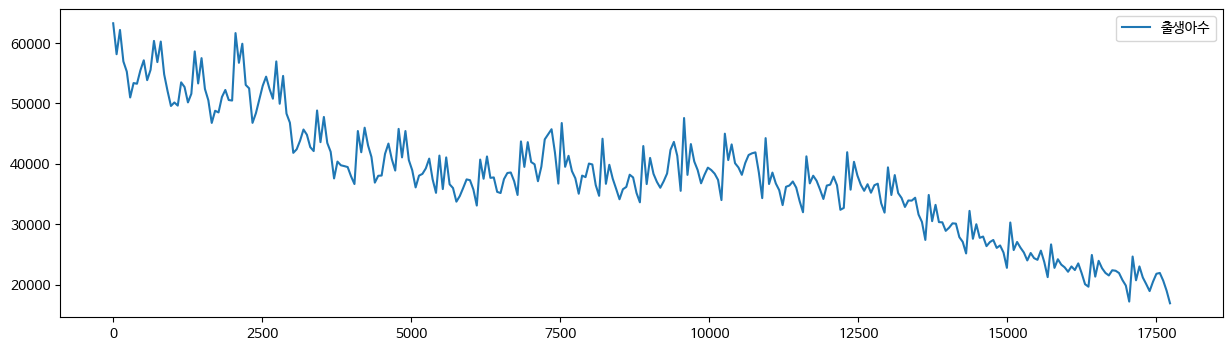

In [81]:
df_all.plot(figsize=(15,4))

<Axes: xlabel='연도,월'>

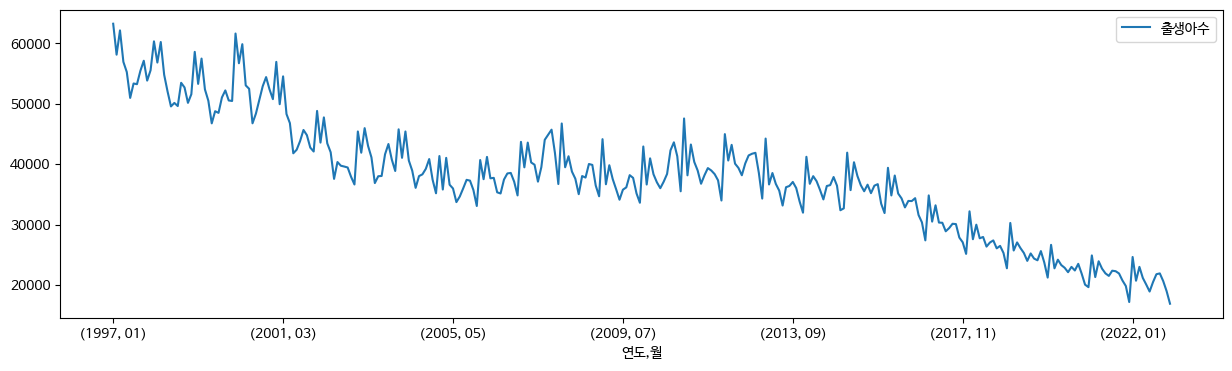

In [82]:
df_all.set_index(['연도','월']).plot(figsize=(15,4))

In [55]:
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체


<Axes: xlabel='연도,월'>

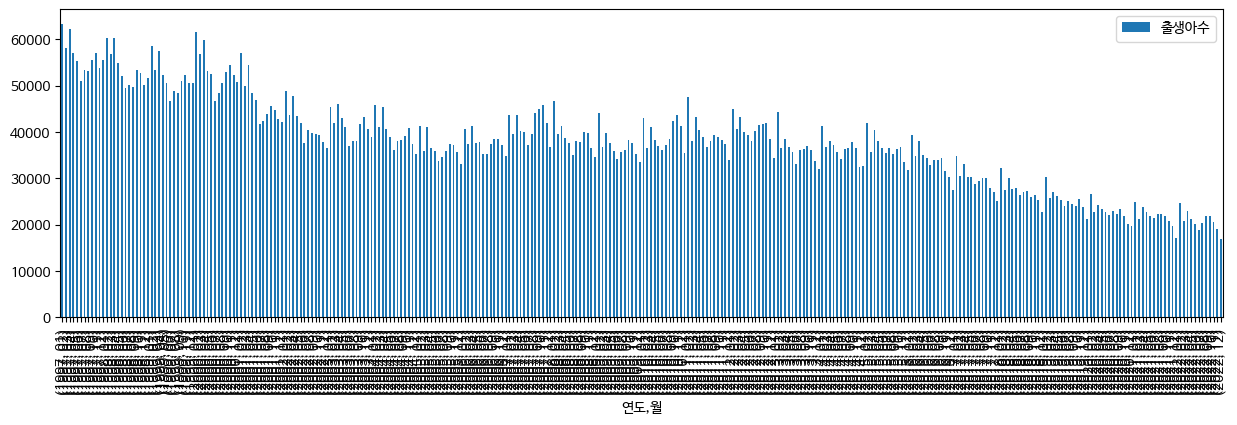

In [83]:
#df_all.set_index(['연도','월']).plot.bar(figsize=(15,4))
df_all.set_index(['연도','월']).plot(kind='bar',figsize=(15,4))

In [57]:
df_all[-24:]  # 최근2년 (24개월)



,시군구별,기간,출생아수,연도,월,성별
16417,전국,2021.01,24894.0,2021,01,전체
16474,전국,2021.02,21306.0,2021,02,전체
16531,전국,2021.03,23925.0,2021,03,전체
16588,전국,2021.04,22703.0,2021,04,전체
16645,전국,2021.05,21922.0,2021,05,전체
16702,전국,2021.06,21504.0,2021,06,전체
16759,전국,2021.07,22364.0,2021,07,전체
16816,전국,2021.08,22282.0,2021,08,전체
16873,전국,2021.09,21905.0,2021,09,전체
16930,전국,2021.10,20749.0,2021,10,전체


In [58]:
df_all[-24:]['연도'].unique()

array(['2021', '2022'], dtype=object)

In [59]:
df_all[-24:]['월'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [60]:
df_all[-24:]['월'].value_counts()

01    2
02    2
03    2
04    2
05    2
06    2
07    2
08    2
09    2
10    2
11    2
12    2
Name: 월, dtype: int64

<Axes: xlabel='연도,월'>

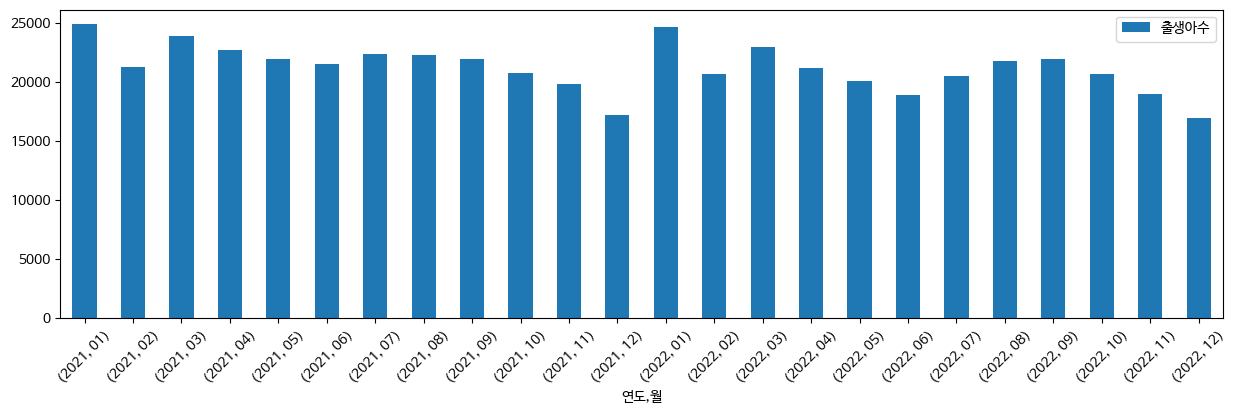

In [84]:
#최근 2년(24개만) 가져와서 그래프로 그려준다.
df_all[-24:].set_index(['연도','월']).plot(kind='bar',figsize=(15,4),rot=45)

### Seaborn 통한 시각화


<Axes: xlabel='연도', ylabel='출생아수'>

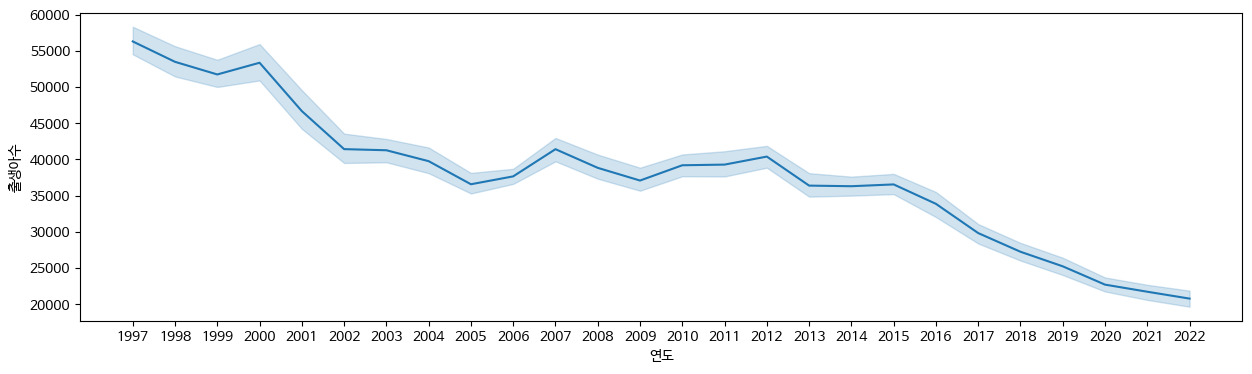

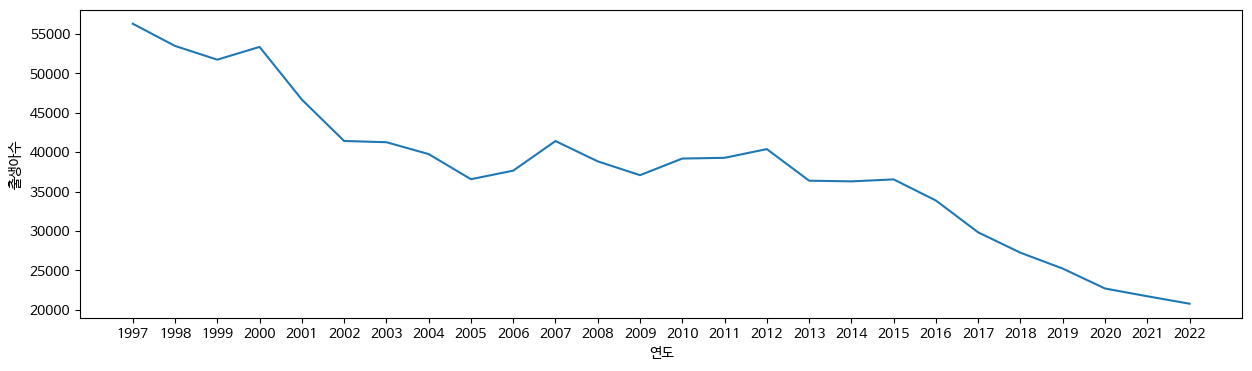

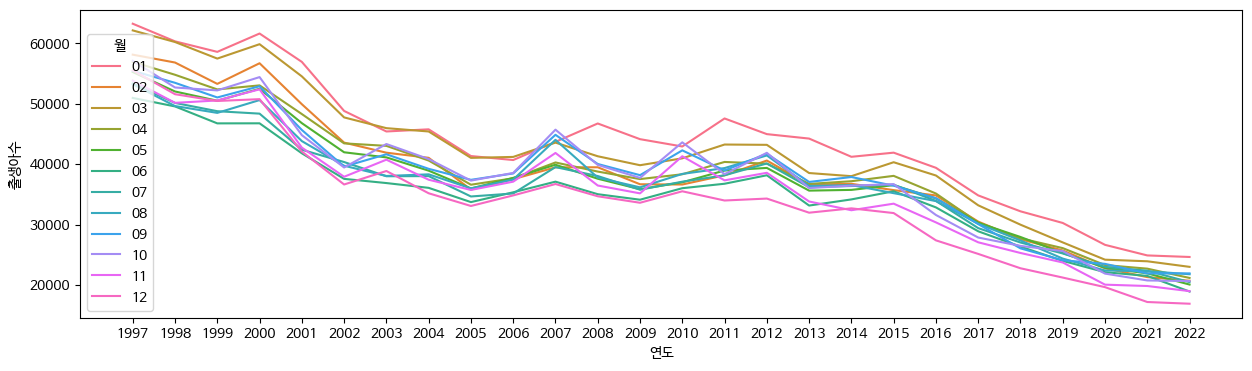

In [85]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_all,x ='연도', y ='출생아수')

#ci (Confidence Interval : 신뢰구간)
# 신뢰구간 : 통계학에서 모수가 어느 범위 안에 있는지 확률적으로 보여주는 방법이다.
plt.figure(figsize=(15,4))
#sns.lineplot(data=df_all,x ='연도', y ='출생아수', ci=None)
sns.lineplot(data=df_all,x ='연도', y ='출생아수', errorbar=None)



plt.figure(figsize=(15,4))
sns.lineplot(data=df_all,x ='연도', y ='출생아수', errorbar=None, hue='월')



<Axes: xlabel='연도', ylabel='출생아수'>

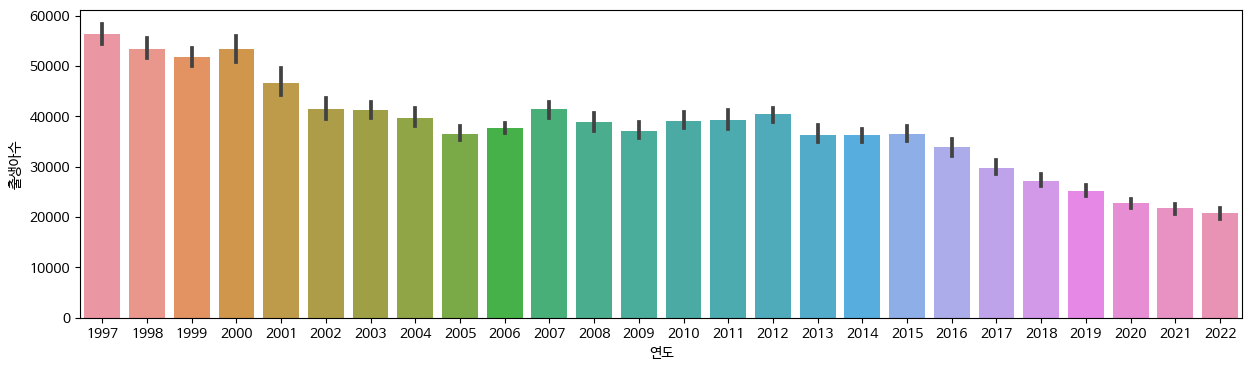

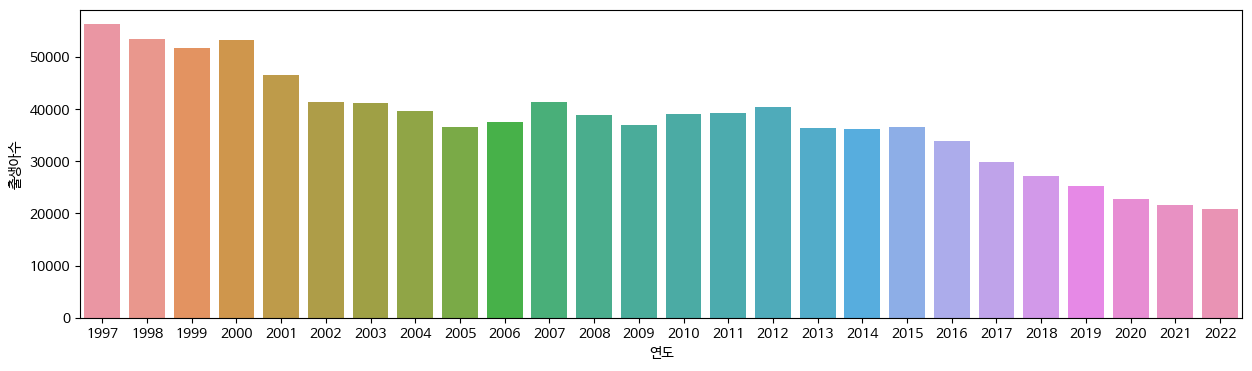

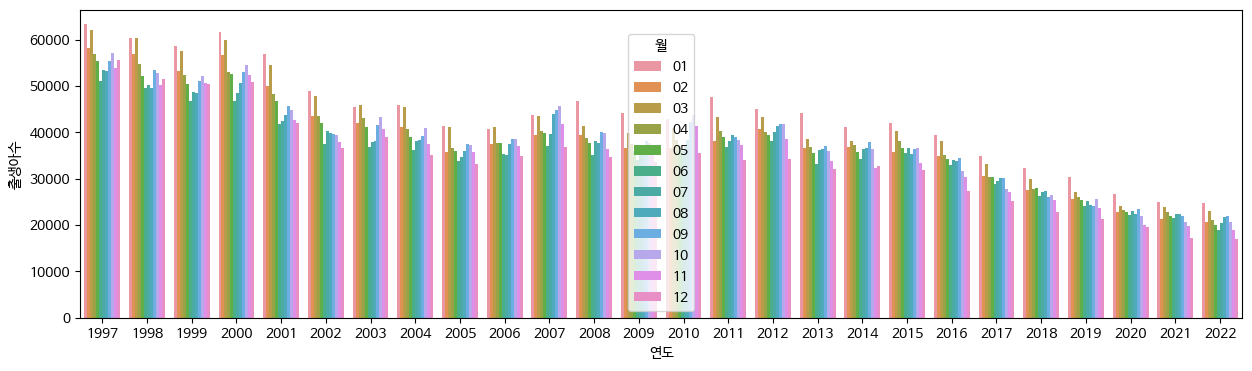

In [86]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_all,x ='연도', y ='출생아수')

#ci (Confidence Interval : 신뢰구간)
# 신뢰구간 : 통계학에서 모수가 어느 범위 안에 있는지 확률적으로 보여주는 방법이다.
plt.figure(figsize=(15,4))
#sns.lineplot(data=df_all,x ='연도', y ='출생아수', ci=None)
sns.barplot(data=df_all,x ='연도', y ='출생아수', errorbar=None)



plt.figure(figsize=(15,4))
sns.barplot(data=df_all,x ='연도', y ='출생아수', errorbar=None, hue='월')

## 지역별 출생아수

In [64]:
df_local=df[df['시군구별'] !='전국'].copy()
df_local.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
3,부산광역시,1997.01,4201.0,1997,01,전체
4,대구광역시,1997.01,3345.0,1997,01,전체
5,인천광역시,1997.01,3646.0,1997,01,전체
6,광주광역시,1997.01,2166.0,1997,01,전체


In [65]:
df_local['시군구별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

<Axes: xlabel='연도', ylabel='출생아수'>

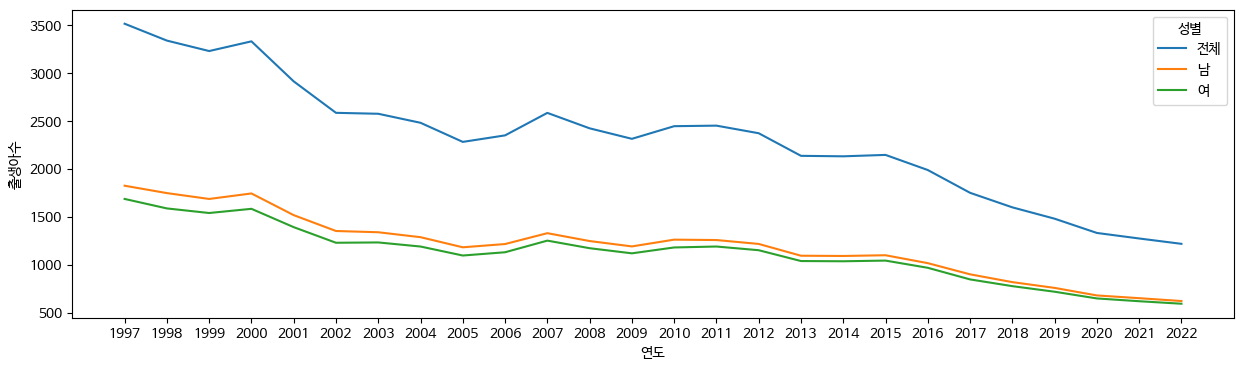

In [87]:
plt.figure(figsize=(15,4))
#sns.lineplot(data=df_local, x='연도',y='출생아수',ci=None, hue='성별')
sns.lineplot(data=df_local, x='연도',y='출생아수',errorbar=None, hue='성별')

<Axes: xlabel='연도', ylabel='출생아수'>

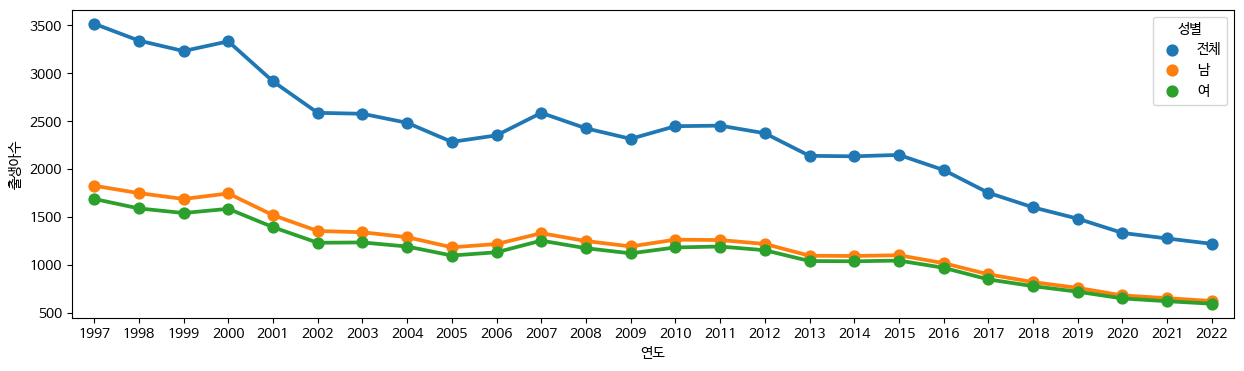

In [88]:
plt.figure(figsize=(15,4))
#sns.lineplot(data=df_local, x='연도',y='출생아수',ci=None, hue='성별')
sns.pointplot(data=df_local, x='연도',y='출생아수',errorbar=None, hue='성별')

In [68]:
#df_local와 df의 행 개수가 다르므로 아래와 같은 경고가 뜬다
#UserWarning: Boolean Series key will be reindexed to match DataFrame index.
#df_local_total= df_local[df['성별']=='전체']
#df_local_total.head()

In [69]:
!pip install --upgrade ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.1 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.27.1 which is incompatible.


In [70]:
#DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
#and should_run_async(code)

df_local_total= df_local[df_local['성별']=='전체']
df_local_total.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
3,부산광역시,1997.01,4201.0,1997,01,전체
4,대구광역시,1997.01,3345.0,1997,01,전체
5,인천광역시,1997.01,3646.0,1997,01,전체
6,광주광역시,1997.01,2166.0,1997,01,전체


In [71]:
df_local_total['성별'].unique()

array(['전체'], dtype=object)

In [72]:
import warnings

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_

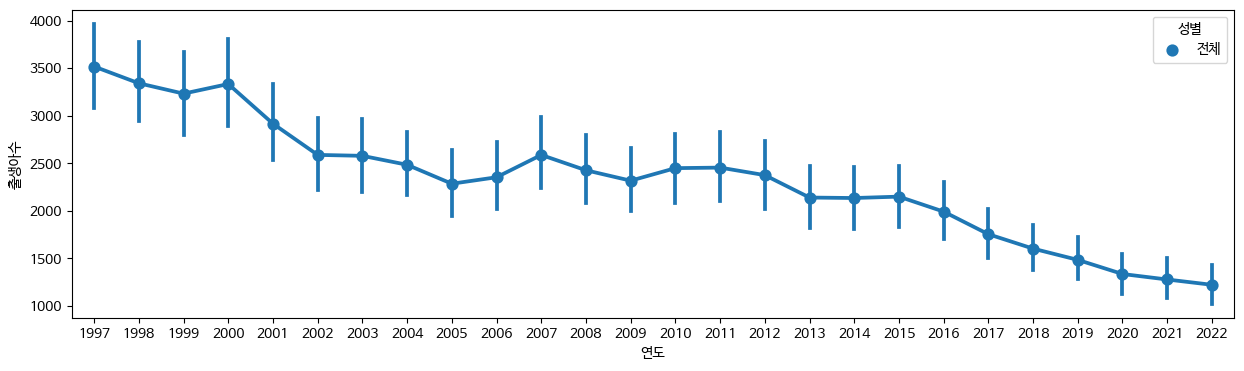

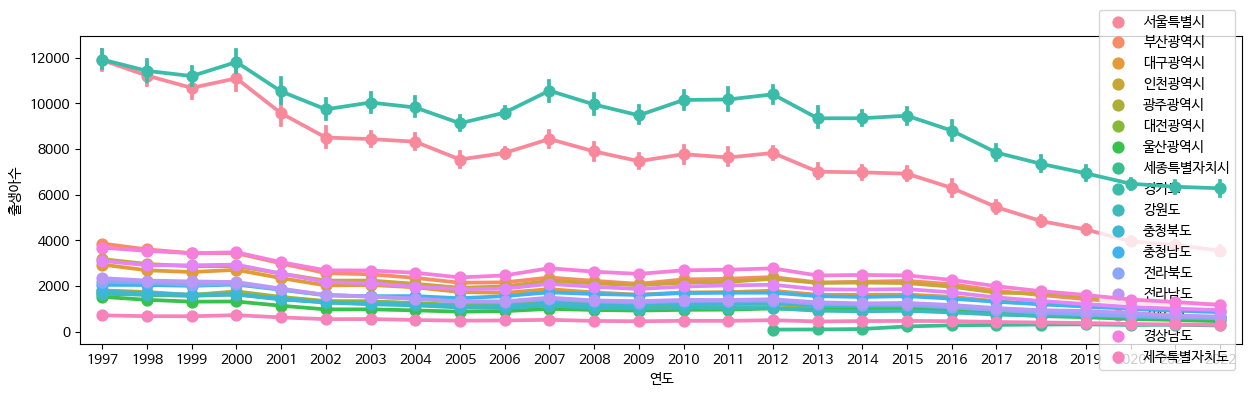

In [89]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local_total, x='연도', y='출생아수', hue='성별')


plt.figure(figsize=(15,4))
sns.pointplot(data=df_local_total, x='연도', y='출생아수', hue='시군구별')

plt.legend(loc='center right') #범례위치
plt.show()

In [74]:
df_local_total_2= df_local_total[df_local_total['시군구별'].isin(['서울특별시','경기도','세종특별자치시'])]
df_local_total_2.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
9,세종특별자치시,1997.01,NaN,1997,01,전체
10,경기도,1997.01,13440.0,1997,01,전체
59,서울특별시,1997.02,12239.0,1997,02,전체
66,세종특별자치시,1997.02,NaN,1997,02,전체


In [75]:
df_local_total_2['시군구별'].unique()

array(['서울특별시', '세종특별자치시', '경기도'], dtype=object)

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_

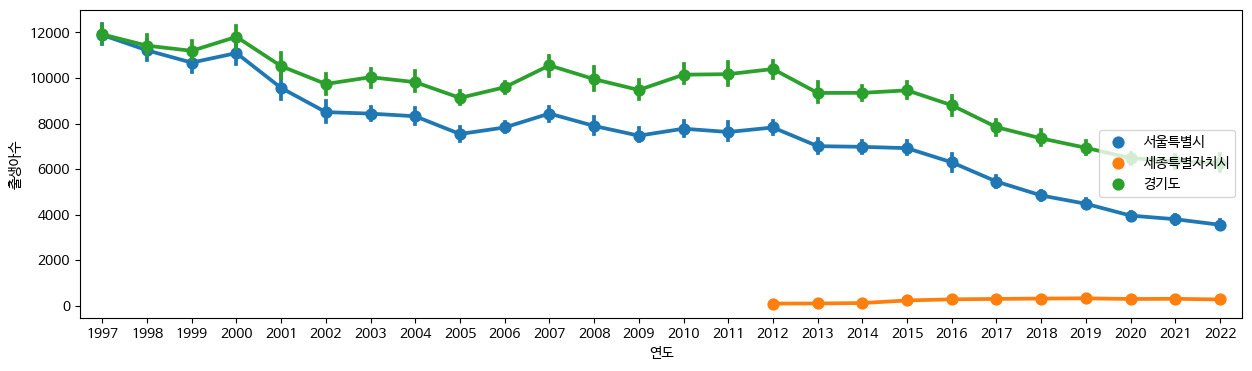

In [90]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local_total_2, x='연도', y='출생아수', hue='시군구별')
plt.legend(loc='center right') #범례위치
plt.show()

In [95]:
df_local_total_3= df_local_total_2[df_local_total_2['시군구별']== '세종특별자치시'].dropna()
df_local_total_3.head()

,시군구별,기간,출생아수,연도,월,성별
10269,세종특별자치시,2012.01,73.0,2012,01,전체
10326,세종특별자치시,2012.02,74.0,2012,02,전체
10383,세종특별자치시,2012.03,92.0,2012,03,전체
10440,세종특별자치시,2012.04,84.0,2012,04,전체
10497,세종특별자치시,2012.05,72.0,2012,05,전체


In [98]:
df_local_total_3['시군구별'].unique()

array(['세종특별자치시'], dtype=object)

<Axes: xlabel='연도', ylabel='출생아수'>

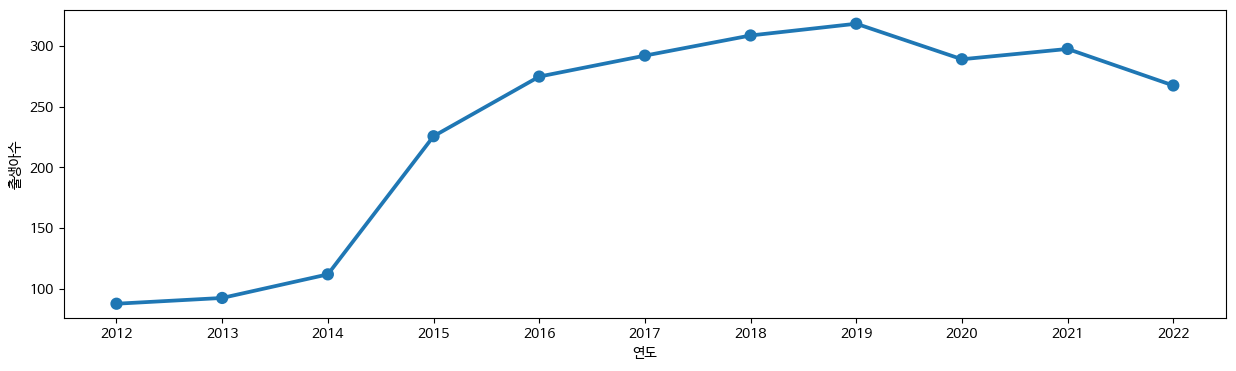

In [100]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local_total_3, x='연도', y='출생아수', errorbar=None)